In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import animation

In [2]:
clr1 = 'dimgray'
params={
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top' : False,
    'axes.spines.bottom' : False,
    'axes.labelcolor' : clr1,
    'axes.labelsize': 'medium',
    'axes.titlecolor': clr1,
    'xtick.color' : clr1,
    'ytick.color' : clr1,
    'lines.linewidth' : 2,
    'font.size' : 20, 
    'legend.framealpha': 0.5,
    'text.color' : clr1}

for (k,v) in params.items():
    mpl.rcParams[k] = v

plt.style.use('fast')#'seaborn-bright')

CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'

color_list = [CB91_Blue, CB91_Amber, CB91_Pink, CB91_Green,
              CB91_Purple, CB91_Violet]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)

<AxesSubplot:title={'center':'n=2'}>

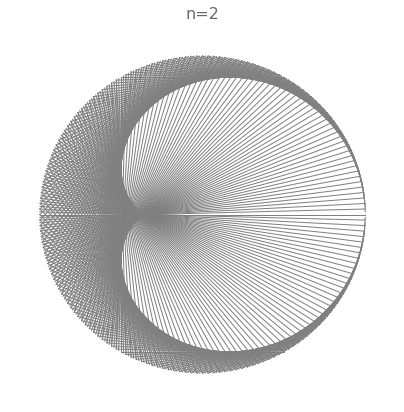

In [5]:
def epicycloid(n, r=1, ax=None, draw_circle=False, draw_points=False):
    if ax is None:
        fig, ax = plt.subplots(1,1, figsize=(7,7))
    
    if draw_circle:
        circle1 = plt.Circle((0, 0), r, ec='black', fc='None', lw=1.)
        ax.add_patch(circle1)
        
    points = [p for p in range(0, 360, 1)]
    xx=[r*np.cos(i*np.pi/180) for i in points ]
    yy=[r*np.sin(i*np.pi/180) for i in points]

    indx = [i for i in range(len(points)) ]
    targets = [(n*i)%len(points) for i in range(len(points)) ]

    if draw_points:
        ax.scatter(xx, yy, lw=1., color='violet')

    for i in indx:
        t = int(targets[i])
        ax.plot([xx[i], xx[t]], [ yy[i], yy[t] ], lw=1., alpha=1, color='gray' )

    ax.set_xlim(-1.2,1.2)
    ax.set_ylim(-1.2,1.2)
    ax.set_xticks([]);
    ax.set_yticks([]);
    ax.set_title(f"n={n}", fontsize=16)
    return ax
epicycloid(2)

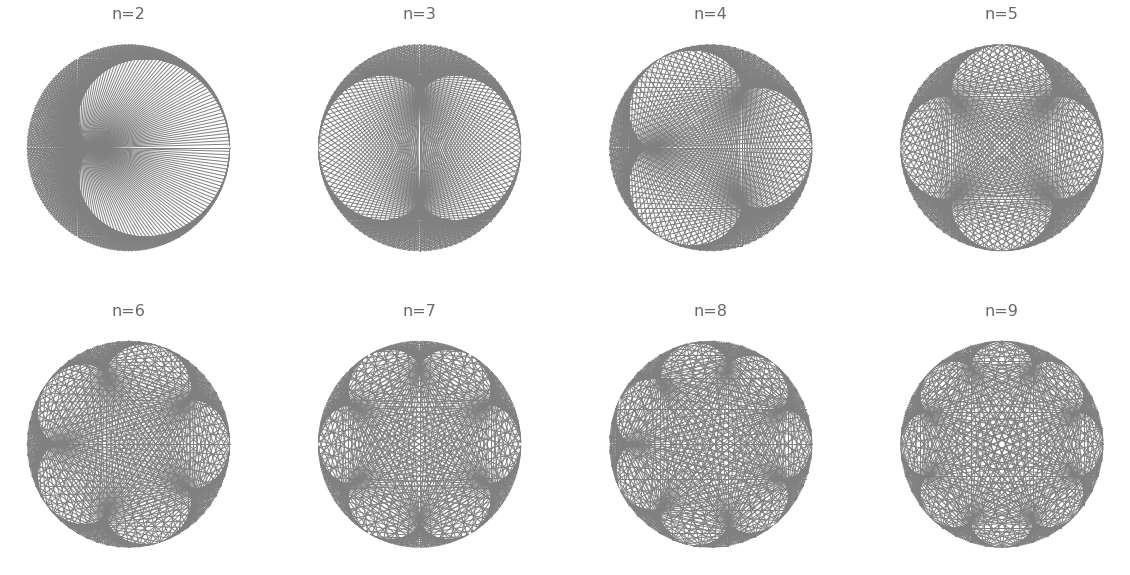

In [6]:
fig, axx = plt.subplots(2, 4, figsize=(20,10))

for i in range(axx.size):
    axi = axx[i//(axx.shape[1]), i%(axx.shape[1])]
    epicycloid(i+2, ax=axi)

## Animation

In [7]:
def animation_(color_plot=False):    
    fig, ax = plt.subplots(figsize=(10, 10))

    def update(ii):
        ax.clear()
        n = ii+2; r=1
        
        # Draw a circle
        circle1 = plt.Circle((0, 0), r, ec='black', fc='None', lw=1.)
        ax.add_patch(circle1)
        
        # calculate and draw evenly spaced points on the circle
        points = [p for p in range(0, 360, 1)]
        xx=[r*np.cos(t*np.pi/180) for t in points ]
        yy=[r*np.sin(t*np.pi/180) for t in points ]
        ax.scatter(xx, yy, lw=1., color='violet')
        
        # Draw the lines for a given n
        indx    = range(len(points))
        targets = [(n*i)%len(points) for i in range(len(points)) ]
        for i in indx:
            t = int(targets[i])
            if color_plot:
                ax.plot([xx[i], xx[t]], [ yy[i], yy[t] ], lw=1., alpha=1)
            else:
                ax.plot([xx[i], xx[t]], [ yy[i], yy[t] ], lw=1., alpha=1, color='gray' )

                
        # draw a center of the circle. Just for a reference
        ax.scatter([0],[0], lw=1., alpha=1, color='red' )
        ax.set_xlim(-1.1,1.1); ax.set_ylim(-1.1,1.1);
        ax.set_xticks([]); ax.set_yticks([]);
        ax.set_title(f"n -> {n}n", fontsize=24)
        return ax
    savename="animation_200_frames.mp4"
    anim = animation.FuncAnimation(fig, update,interval=100, frames=200)
    anim.save(savename, writer=animation.FFMpegWriter(fps=2))


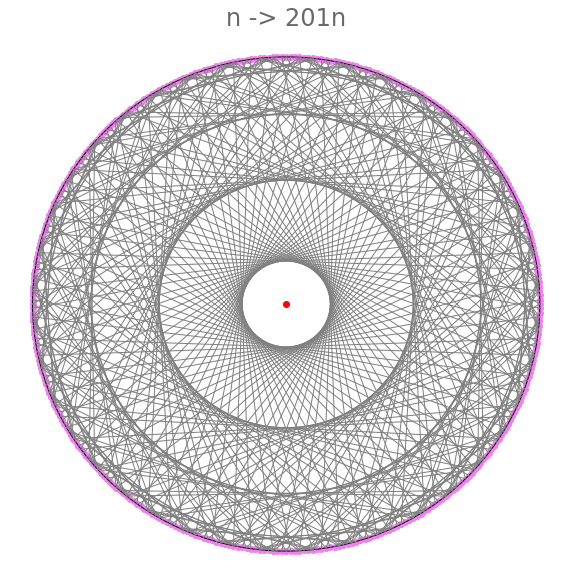

In [8]:
animation_()

## Play with the colors

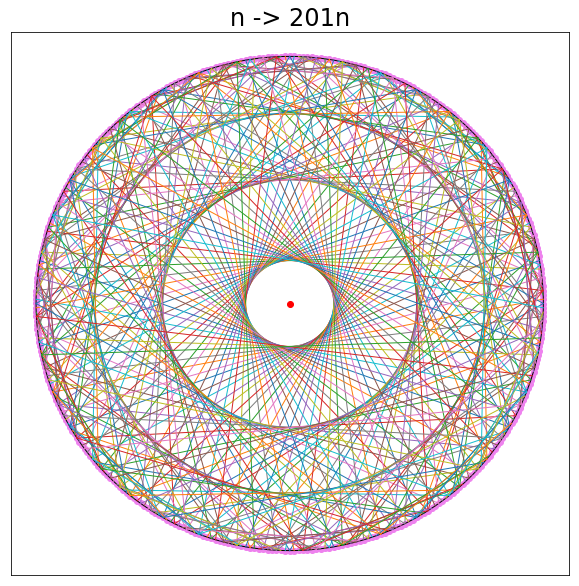

In [8]:
animation_(color_plot=True)

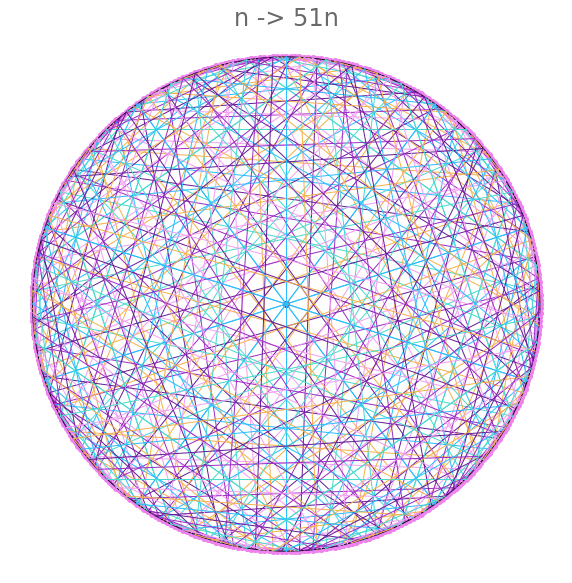

In [14]:
animation_(color_plot=True)